In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars24-car-price/cars24-car-price-cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/cars24-car-price/cars24-car-price-cleaned.csv')

%config IPCompleter.greedy = True
%config IPCompleter.use_jedi = True

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
#Check for null values
df.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64

In [5]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
count,19820.000000,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,2014.561453,5.815856e+04,19.503402,1475.702381,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.487841,0.802674,0.835015,0.152825
std,4.847364,3.196636,5.171563e+04,4.297784,518.571223,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.499865,0.397990,0.371176,0.359828
min,0.300000,1992.000000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2013.000000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.200000,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,20.902500,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('unique values in make',df['make'].nunique())
print('unique values in model',df['model'].nunique())

unique values in make 41
unique values in model 3233


In [7]:
# target encoding

df['make'] =  df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18000,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,4.81875,1,0,0,0,0,1,1,1,0


In [8]:
y = df['selling_price']
X = df.drop(columns=['selling_price'])

X.shape,y.shape

((19820, 17), (19820,))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns )
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state = 32)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [12]:
r2_sq = model.score(X_test,y_test)
r2_sq

0.9419052001730144

In [13]:
n = X_test.shape[0]
d= X_test.shape[1]
adjusted_r2 = 1 - (1- r2_sq) * ((n-1)/(n-d-1))
adjusted_r2

0.9417051573135736

In [14]:
model.intercept_

-12854798094105.02

In [15]:
model.coef_

array([ 1.28547981e+13, -5.17382812e+00, -5.13035060e+00,  1.01648580e+00,
        1.05569681e+00,  1.28547981e+13,  1.56854937e+00,  1.77276605e+01,
       -1.48803242e-01, -1.29116472e-01,  1.44550375e-01,  2.44909926e+00,
        3.15774163e-01, -1.51586853e-01, -3.67899669e-02, -3.31047646e-01,
       -4.85406223e-01])

In [16]:
data = pd.DataFrame(list(zip(X.columns,np.abs(model.coef_))),columns = ['features','coef'])
data = data.sort_values('coef', ascending = False)
data

,features,coef
0,year,1.285480e+13
5,age,1.285480e+13
7,model,1.772766e+01
1,km_driven,5.173828e+00
2,mileage,5.130351e+00
11,Electric,2.449099e+00
6,make,1.568549e+00
4,max_power,1.055697e+00
3,engine,1.016486e+00
16,>5,4.854062e-01


<Axes: xlabel='coef', ylabel='features'>

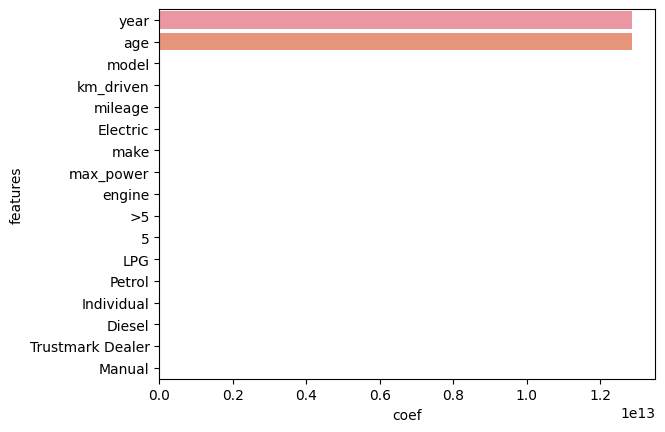

In [17]:
import seaborn as sns

sns.barplot(data = data , x = 'coef', y= 'features')

In [18]:
import statsmodels.api as sm

In [19]:
y_train = np.array(y_train)

X_sm = sm.add_constant(X_train)

model = sm.OLS(y_train,X_sm)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.663e+04
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:04:52   Log-Likelihood:                -22754.
No. Observations:               14865   AIC:                         4.554e+04
Df Residuals:                   14848   BIC:                         4.567e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.478e+12   1.92e+12  

In [20]:
# Now we would like to write a function where we can remove features who have VIF > threshold(5) or adj R2 goes below 0.85

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def iterative_vif_feature_selection(X_scaled, y, 
                                    vif_threshold=5.0, 
                                    r2_threshold=0.85, 
                                    init_drop=None):
    """
    Iteratively remove the feature with the highest VIF until all VIFs 
    are below vif_threshold or adjusted R² drops below r2_threshold.
    
    Parameters
    ----------
    X_scaled : array-like or DataFrame
        Scaled feature matrix.
    y : array-like
        Target vector.
    vif_threshold : float
        Maximum allowed variance inflation factor.
    r2_threshold : float
        Minimum acceptable adjusted R².
    init_drop : list of str, optional
        Features to drop before starting the iteration.
        
    Returns
    -------
    selected_features : list of str
        Features that remain.
    removed_features : list of str
        Features removed in order.
    final_vif : DataFrame
        VIFs of the remaining features.
    final_adj_r2 : float
        Adjusted R² of the final model.
    """
    # Prepare
    X_df = pd.DataFrame(X_scaled, columns=X_train.columns)
    features = list(X_df.columns)
    removed = init_drop[:] if init_drop else []
    
    # Initial drop
    if removed:
        for feat in removed:
            features.remove(feat)
    
    while True:
        # Compute VIFs
        X_sub = X_df[features]
        vif_data = (
            pd.DataFrame({
                'feature': features,
                'vif': [
                    variance_inflation_factor(X_sub.values, idx)
                    for idx in range(X_sub.shape[1])
                ]
            })
            .assign(vif=lambda df: df.vif.round(2))
            .sort_values('vif', ascending=False)
            .reset_index(drop=True)
        )
        
        # Fit OLS with intercept
        X_with_const = sm.add_constant(X_sub)
        model = sm.OLS(y, X_with_const).fit()
        adj_r2 = model.rsquared_adj
        
        # Check stopping criteria
        highest_vif = vif_data.loc[0, 'vif']
        if highest_vif < vif_threshold or adj_r2 < r2_threshold:
            break
        
        # Drop the feature with highest VIF
        to_drop = vif_data.loc[0, 'feature']
        features.remove(to_drop)
        removed.append(to_drop)
    
    return features, removed, vif_data, adj_r2


# Usage
selected_feats, feats_removed, final_vif_df, final_adj_r2 = iterative_vif_feature_selection(
    X_scaled = X_train,
    y        = y_train,
    vif_threshold = 5.0,
    r2_threshold  = 0.87,
    init_drop     = []
)

print("Selected features:", selected_feats)
print("Removed in order:", feats_removed)
print("Final adjusted R²:", round(final_adj_r2, 3))
print(final_vif_df)


Selected features: ['km_driven', 'age', 'model', 'Individual', 'Trustmark Dealer', 'Electric', 'LPG', 'Petrol', 'Manual', '>5']
Removed in order: ['year', '5', 'engine', 'Diesel', 'max_power', 'make', 'mileage']
Final adjusted R²: 0.944
            feature   vif
0               age  4.58
1            Manual  4.01
2         km_driven  2.45
3            Petrol  2.03
4             model  1.88
5        Individual  1.72
6                >5  1.40
7  Trustmark Dealer  1.03
8               LPG  1.02
9          Electric  1.00


In [21]:
X_new = X_train[selected_feats]
X_sm = sm.add_constant(X_new)
ols_model = sm.OLS(y_train,X_sm)

results =  model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.663e+04
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:04:52   Log-Likelihood:                -22754.
No. Observations:               14865   AIC:                         4.554e+04
Df Residuals:                   14848   BIC:                         4.567e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.478e+12   1.92e+12  